In [729]:
# from google.colab import drive
# drive.mount('/content/drive/')

### Importation module

In [730]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt


### Connection with Colab / VSC

In [731]:
# colab
# quotes = pd.read_csv("/content/drive/MyDrive/Opply/Opply/d5d9348e5c87368cc1b74e6d4dde9794/Quotes.csv")
# request = pd.read_csv('/content/drive/MyDrive/Opply/Opply/d5d9348e5c87368cc1b74e6d4dde9794/Requests.csv')

# vsc

quotes = pd.read_csv("Quotes.csv")
requests = pd.read_csv("Requests.csv")

# 1 - Exploration

In [732]:
print(requests.shape)
print(quotes.shape)

(389, 4)
(492, 6)


In [733]:
requests.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,£3.00,Price
1,08f1a913-1318-4656-9418-ce580a9871cb,£0.01,£0.01,Price
2,8cd6fd33-a1bc-43cb-9c63-df7d629d5362,£0.01,£0.01,Price
3,9388fbf6-410b-4f85-999a-1ff4d4cb733b,£0.01,£0.01,Price
4,37d05dfe-7f47-4eed-8e78-9f74c303bcad,£0.01,£0.01,Price


In [734]:
quotes.head()

,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided
0,94ba38d1-57ed-4a60-92d1-47b55a40a6dd,£5.10,Available,NaN,NaN,NaN
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,Available,NaN,Yes,NaN
2,08f1a913-1318-4656-9418-ce580a9871cb,"£1,768.89",Available,NaN,Yes,Yes
3,4dedeeb1-12a5-4589-82ee-015e46d85790,£4.65,Declined,pricing: Too high,NaN,NaN
4,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£13.00,Available,NaN,NaN,NaN


In [735]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Request UUID        389 non-null    object
 1   Current Unit Price  389 non-null    object
 2   Target Unit Price   389 non-null    object
 3   Supply Priority     287 non-null    object
dtypes: object(4)
memory usage: 12.3+ KB


In [736]:
quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Request UUID        492 non-null    object
 1   Quote Unit Price    492 non-null    object
 2   Status              492 non-null    object
 3   Decline Reason      58 non-null     object
 4   Samples Available   275 non-null    object
 5   Documents Provided  279 non-null    object
dtypes: object(6)
memory usage: 23.2+ KB


* Identified unique values for each column.


In [737]:
# Quotes
for col in quotes.columns:
  unique_value = quotes[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = quotes[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {quotes[col].dtypes} -')
  print('---------------------------')

> : Request UUID ==> : ['94ba38d1-57ed-4a60-92d1-47b55a40a6dd'
 '820412eb-8d4d-4d6c-a5e3-cfc977cd6d48'
 '08f1a913-1318-4656-9418-ce580a9871cb'
 '4dedeeb1-12a5-4589-82ee-015e46d85790'
 '37d05dfe-7f47-4eed-8e78-9f74c303bcad'
 '50ef47ee-1cb8-44bf-9444-2c057fdc72ca'
 '4963b6de-4d98-4f0d-8ee5-47d2a227279b'
 '164cd9f1-fef3-41f5-89b6-14f3ca3acdf5'
 '8d378ea3-c746-4816-8856-905dff39bb8a'
 '60d19385-41bd-4b71-96e4-e6c2a93040ea'
 '4e98d968-c92f-4b55-af32-1f9d41ef7260'
 '57878c43-4147-4260-b99e-54105f29e860'
 'fca03c4f-3f16-40d0-b87c-16d9343e4a52'
 'd596642b-c417-49e6-aa3b-ec6185fb2b9f'
 'dd82336a-4eff-4b2e-af80-ec2825b7bd33'
 'a1ef94d7-7a8c-4c3d-b60f-a40e93401198'
 '531a47f6-3862-40e4-985a-46743751cce0'
 '39c19049-87c7-44b9-b5aa-3b6bac20d7d4'
 'd9564a3f-ea2c-472a-8d8c-8362b4b1c411'
 '4d7c0088-27eb-43a0-b88d-2c199568d656'
 '8b0aa667-04d0-481d-8d49-5a7c71e41163'
 '17666e5e-933d-4cf0-9017-47b351784d57'
 '15a80e87-9e27-4f3e-abb6-dff075964505'
 'cc66f476-9f26-426c-9216-0150c87f8c78'
 'e42a5914-1b6e-4

* 50 % of Decline Reason is : pricing 
  * to do : group the 'pricing:' and 'pricing' lines and analyze why ?

In [738]:
# Requests
for col in requests.columns:
  unique_value = requests[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = requests[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {requests[col].dtypes} -')
  print('---------------------------')

> : Request UUID ==> : ['820412eb-8d4d-4d6c-a5e3-cfc977cd6d48'
 '08f1a913-1318-4656-9418-ce580a9871cb'
 '8cd6fd33-a1bc-43cb-9c63-df7d629d5362'
 '9388fbf6-410b-4f85-999a-1ff4d4cb733b'
 '37d05dfe-7f47-4eed-8e78-9f74c303bcad'
 '861a44fc-61f4-4781-85ee-dcd6d75d22fc'
 '80501725-52ec-47bc-a3a6-0783011bddba'
 '4dedeeb1-12a5-4589-82ee-015e46d85790'
 '4963b6de-4d98-4f0d-8ee5-47d2a227279b'
 'fe63572b-1d50-46f5-bc29-93e2253e256e'
 '4e98d968-c92f-4b55-af32-1f9d41ef7260'
 'fca03c4f-3f16-40d0-b87c-16d9343e4a52'
 'd596642b-c417-49e6-aa3b-ec6185fb2b9f'
 '164cd9f1-fef3-41f5-89b6-14f3ca3acdf5'
 '8b0aa667-04d0-481d-8d49-5a7c71e41163'
 '4d7c0088-27eb-43a0-b88d-2c199568d656'
 '17666e5e-933d-4cf0-9017-47b351784d57'
 '8d378ea3-c746-4816-8856-905dff39bb8a'
 '487409ea-38f8-4970-bee1-f470445c1c57'
 '57878c43-4147-4260-b99e-54105f29e860'
 'f0cde0c6-e474-42c1-87eb-95f1442b1f37'
 '15a80e87-9e27-4f3e-abb6-dff075964505'
 'fe78ec5b-5ff6-4a9c-8856-2856961cd303'
 '531a47f6-3862-40e4-985a-46743751cce0'
 '68c07ec1-e658-4

# 2 - Quotes :

## 2 - 1 - Cleaning :

In [739]:
quotes["Status"].value_counts()

Status
Expired             290
Available           124
Ordered              58
Declined             17
Contract Created      1
pending_payment       1
Proceeded             1
Name: count, dtype: int64

In [740]:
# * replace nan by 'no' on column "Samples Available" and "Documents Provided"

quotes["Documents Provided"] = quotes["Documents Provided"].fillna('No')
quotes["Samples Available"] = quotes["Samples Available"].fillna('No')

In [741]:
# delete £

quotes['Quote Unit Price'] = quotes['Quote Unit Price'].replace('£', '', regex=True)

In [742]:
# convert columns 'Quote Unit Price	' to integer

quotes['Quote Unit Price'] = quotes['Quote Unit Price'].replace({',': ''}, regex=True).astype(float).round(2)
quotes['Quote Unit Price'] = quotes['Quote Unit Price'].astype(float).round(2)


In [743]:
quotes['Decline Reason'] = quotes['Decline Reason'].fillna('None')


In [744]:
quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Request UUID        492 non-null    object 
 1   Quote Unit Price    492 non-null    float64
 2   Status              492 non-null    object 
 3   Decline Reason      492 non-null    object 
 4   Samples Available   492 non-null    object 
 5   Documents Provided  492 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.2+ KB


## 2 - 2 - Analysis

### 2-2-1 New column : "decline reason new"

* creation of new column **'decline reason new'** with 3 labels :
  * **not specified** : for all values nan
  * **pricing** : for all row of the reason mentionned pricing (I suppose that as soon as pricing is indicated, it means that the price is too high)
  * **no decline** : column 'Status' = 'Ordered'
  * **others** : for other reason

for other reason

In [745]:
# NaN by "not specified"
# quotes["Decline Reason New"] = np.where(quotes['Decline Reason'].isna(), 'not specified', quotes["Decline Reason"])
quotes["Decline Reason New"] = np.where(quotes['Decline Reason'] == 'None', 'not specified', quotes["Decline Reason"])

# "pricing" 
quotes["Decline Reason New"] = np.where(quotes['Decline Reason New'].str.contains('pricing', case=False), 'pricing', quotes["Decline Reason New"])

# "no decline"
quotes["Decline Reason New"] = np.where(quotes['Status'] == 'Ordered', 'no decline', quotes["Decline Reason New"])

# "others"
quotes["Decline Reason New"] = np.where(
    (
        (quotes["Decline Reason New"] != 'not specified') &
        (quotes["Decline Reason New"] != 'no decline') &
        (~quotes["Decline Reason New"].str.contains('pricing', case=False))
    ),
    'others',
    quotes["Decline Reason New"]
)


In [746]:
# Repartion of Decline Reason New
quotes['Decline Reason New'].value_counts(normalize= True).round(2) * 100

Decline Reason New
not specified    76.0
no decline       12.0
pricing          10.0
others            2.0
Name: proportion, dtype: float64

* only 10% of decline are due to price 

In [747]:
# create df with "Decline Reason New" = not specified
# understand why label "not specified = 76%"
quotes_not_specified = quotes[quotes['Decline Reason New'] == 'not specified']
quotes_not_specified.head()

,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
0,94ba38d1-57ed-4a60-92d1-47b55a40a6dd,5.10,Available,None,No,No,not specified
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.50,Available,None,Yes,No,not specified
2,08f1a913-1318-4656-9418-ce580a9871cb,1768.89,Available,None,Yes,Yes,not specified
4,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,13.00,Available,None,No,No,not specified
6,4dedeeb1-12a5-4589-82ee-015e46d85790,2.97,Available,None,Yes,Yes,not specified


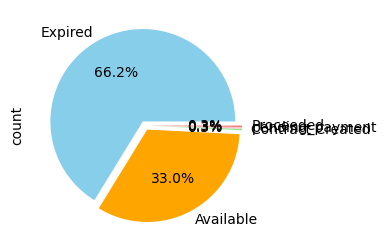

In [748]:
# when Decline Reason is not specified, we represent the distribution of 'Status' 
colors = ['skyblue', 'orange', 'lightgreen', 'pink', 'lightcoral']

plt.figure(figsize=(3,3))
quotes_not_specified["Status"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05, 0.05, 0.05),
    colors=colors
)
plt.show()


* let's try to understand what's in Expired

In [749]:

# Filter 
quotes_decline_not_specified_expired = quotes[(quotes['Decline Reason New'] == 'not specified') & (quotes['Status'] == 'Expired')]
quotes_decline_not_specified_expired.head()

,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
11,50ef47ee-1cb8-44bf-9444-2c057fdc72ca,2.86,Expired,None,No,Yes,not specified
48,52fc0262-ed22-40f7-b983-a8df4c6d7a0d,77.00,Expired,None,Yes,Yes,not specified
60,b9701840-f486-4e5a-989e-bfaf42c0ca65,12.25,Expired,None,No,Yes,not specified
62,cc66f476-9f26-426c-9216-0150c87f8c78,20.00,Expired,None,Yes,No,not specified
66,1c0a5675-bc9e-4a4f-8e1f-eb1f673e0038,2.00,Expired,None,Yes,Yes,not specified


In [750]:
quotes_decline_not_specified_expired.shape

(249, 7)

In [751]:
quotes_decline_not_specified_expired["Decline Reason"].isna().sum()

0

* when in the same time :
  * Status = Expired 
  * Decline Reason New = not specified
 decline reason is NaN in 100% of cases

### 2-2-2 Column "Ordered"

In [752]:
quotes["Status"].value_counts(normalize= True).round(2) * 100

Status
Expired             59.0
Available           25.0
Ordered             12.0
Declined             3.0
Contract Created     0.0
pending_payment      0.0
Proceeded            0.0
Name: proportion, dtype: float64

* 11.79% of quotes are Ordered

### command carried out , so variable status = "Ordered". 

In [753]:
# Filter the dataframe based on the value of "status" == Ordered

quotes_ordered = quotes[quotes['Status'] == 'Ordered']
print(quotes_ordered.shape)
quotes_ordered.head()

(58, 7)


,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
28,fca03c4f-3f16-40d0-b87c-16d9343e4a52,4.65,Ordered,None,Yes,Yes,no decline
30,d596642b-c417-49e6-aa3b-ec6185fb2b9f,0.58,Ordered,None,No,Yes,no decline
79,9cf11f62-7b1e-4a7f-9c40-c12ad721a72b,1.66,Ordered,None,No,Yes,no decline
80,3c583881-a99d-42ca-a81b-648bc6884976,1.58,Ordered,None,No,Yes,no decline
84,2473d2dc-0a5c-4a61-a73d-3050faf0f7a0,3.77,Ordered,None,Yes,No,no decline


/var/folders/kz/qqr4yxrj5nn1nh6fbydp02yc0000gn/T/ipykernel_82155/654951754.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kz/qqr4yxrj5nn1nh6fbydp02yc0000gn/T/ipykernel_82155/654951754.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



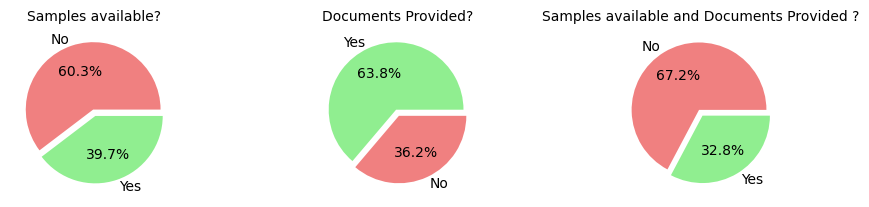

In [754]:
# graphical representation of the variables 'Samples Available' and 'Documents Provided' separated and grouped

plt.figure(figsize=(10,10))
fontsize = 10

# Samples available
plt.subplot(131)
plt.title('Samples available?', fontsize=fontsize)

quotes_ordered["Samples Available"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05),
    colors=['lightcoral', 'lightgreen'], 
)
plt.ylabel('')

# Documents Provided
plt.subplot(132)
plt.title('Documents Provided?', fontsize=fontsize)

quotes_ordered["Documents Provided"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05),
    colors=['lightgreen', 'lightcoral'], 
)
plt.ylabel('')

# Samples available and Documents Provided in the same time
## Create a new column "group_samples_provided" by default = "no" 
quotes_ordered["group_samples_provided"] = "No"

## Condition samples available and Documents Provided in the same time = yes 
## "group_samples_provided" = yes
quotes_ordered["group_samples_provided"] = np.where(
    (quotes_ordered['Samples Available'] == 'Yes') & 
    (quotes_ordered['Documents Provided'] == 'Yes'),
    "Yes",
    quotes_ordered["group_samples_provided"]
)


plt.subplot(133)
plt.title('Samples available and Documents Provided ?', fontsize=fontsize)

quotes_ordered['group_samples_provided'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05),
    colors=['lightcoral', 'lightgreen'], 
)
plt.ylabel('')

plt.subplots_adjust(wspace=0.8)
plt.show()


* 39,7 % of ordered had "Samples available"
* 63,8 % of ordered had "Documents Provided"
* 32,8 % of ordered had "Documents Provided" and "samples available"

# 3 - Requests :

## 3 - 1 - Cleaning :

In [755]:
requests.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,£3.00,Price
1,08f1a913-1318-4656-9418-ce580a9871cb,£0.01,£0.01,Price
2,8cd6fd33-a1bc-43cb-9c63-df7d629d5362,£0.01,£0.01,Price
3,9388fbf6-410b-4f85-999a-1ff4d4cb733b,£0.01,£0.01,Price
4,37d05dfe-7f47-4eed-8e78-9f74c303bcad,£0.01,£0.01,Price


In [756]:
# delete £
requests['Current Unit Price'] = requests['Current Unit Price'].replace('£', '', regex=True)
requests['Target Unit Price'] = requests['Target Unit Price'].replace('£', '', regex=True)

In [757]:
# delete rows with values = 0,01
requests = requests.loc[(requests['Current Unit Price'] != '0.01') & (requests['Target Unit Price'] != '0.01')]


In [758]:
# convert 'columns_to_convert' in int

columns_to_convert = ['Current Unit Price', 'Target Unit Price']

requests[columns_to_convert] = requests[columns_to_convert].replace({',': ''}, regex=True).astype(float).round(2)
requests[columns_to_convert] = requests[columns_to_convert].astype(float).round(2)

In [759]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 388
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Request UUID        354 non-null    object 
 1   Current Unit Price  354 non-null    float64
 2   Target Unit Price   354 non-null    float64
 3   Supply Priority     258 non-null    object 
dtypes: float64(2), object(2)
memory usage: 13.8+ KB


In [760]:
requests['Supply Priority'].isna().sum()

96

In [761]:
requests['Supply Priority'] = requests['Supply Priority'].fillna('None')


Text(0, 0.5, '')

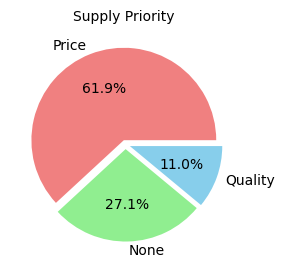

In [762]:
# graphical representation of the variables 'Supply Priority' 

plt.figure(figsize=(3,3))
fontsize = 10

plt.title('Supply Priority ', fontsize=fontsize)

requests["Supply Priority"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05),
    colors=['lightcoral', 'lightgreen', 'skyblue'], 
)
plt.ylabel('')

In [763]:

print("requests :", requests.shape)
print("quotes   :", quotes.shape)

result = (((quotes.shape[0] - requests.shape[0]) / requests.shape[0] ) * 100 )
print("There are ,", round(result), "% more Quotes than Requests")

requests : (354, 4)
quotes   : (492, 7)
There are , 39 % more Quotes than Requests


# 4 - Merge

## 4 - 1 - Merge quotes with request



* Before start merge, show file : Table Requests-Quotes

In [764]:
print(quotes.shape)
print(requests.shape)

(492, 7)
(354, 4)


In [765]:
# merge-outer

merge_outer = requests.merge(right=quotes, on='Request UUID', how='outer')

In [766]:
merge_outer.shape

(631, 10)

In [767]:
merge_outer['Request UUID'].duplicated().sum()

260

In [768]:
merge_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Request UUID        631 non-null    object 
 1   Current Unit Price  600 non-null    float64
 2   Target Unit Price   600 non-null    float64
 3   Supply Priority     600 non-null    object 
 4   Quote Unit Price    492 non-null    float64
 5   Status              492 non-null    object 
 6   Decline Reason      492 non-null    object 
 7   Samples Available   492 non-null    object 
 8   Documents Provided  492 non-null    object 
 9   Decline Reason New  492 non-null    object 
dtypes: float64(3), object(7)
memory usage: 49.4+ KB


## 4 - 2 - Delete of 31 rows ( 5% ) where "Current Unit Price" = 0.0 or NAN

* after the merge and the study below, I decide to delete 5% of the rows because the "currents prices value" is not filled in. 
* These may be new references for buyers, so they don't have any prices to fill in. 
* These 31 values correspond to the rows deleted previously when "current unit price" or "target unit" = 0.01

In [769]:
# all columns without "Request UUID"
colonnes_whitout_request_uuid = [col for col in merge_outer.columns if col != 'Request UUID']

In [770]:
# merge_outer 
for col in merge_outer[colonnes_whitout_request_uuid].columns:
  unique_value = merge_outer[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = merge_outer[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {merge_outer[col].dtypes} -')
  print('---------------------------')

> : Current Unit Price ==> : [3.5000e+00 1.1500e+01 3.6000e+00 4.0000e+00 5.0000e+03 4.5000e+00
 1.0000e+00 2.8000e+00 1.0000e+03 9.6000e-01 2.9500e+00 2.2750e+01
 2.9700e+00 8.2000e+01 1.3980e+01 8.4000e+00 7.3600e+00 8.4100e+00
 3.4330e+01 1.5500e+01 1.3240e+01 2.4800e+01 5.1800e+00 4.8000e+01
 4.6000e+00 6.6400e+00 1.6700e+01 6.7200e+00 1.4000e+01 8.5000e-01
 8.0000e+00 0.0000e+00 2.7000e+01 2.0000e+00 6.9000e+00 1.0500e+01
 2.5000e+00 8.0000e-02 4.9000e+01 3.9900e+00 1.8000e+00 3.0000e+00
 1.2000e+01 1.6600e+00 3.8000e+01 2.2990e+01 3.3000e+00 7.6200e+00
 7.2000e+00 8.5000e+00 1.4260e+01 1.7000e+00 1.5200e+00 6.5000e+00
 1.0000e+02 6.7500e+00 1.6000e+00 2.0000e+01 5.0000e+00 9.8000e-01
 6.0000e+00 1.6700e+00 1.9500e+00 1.2050e+01 1.7250e+01 8.1000e+00
 6.4500e+00 1.8400e+00 6.3300e+00 1.7400e+00 7.4700e+02 3.4800e+00
 3.2000e+00 7.4700e+00 7.5000e+00 6.6000e+00 6.1500e+00 1.9200e+00
 7.6900e+00 4.9900e+00 3.4000e+00 4.2000e+00 9.0000e-02 2.4000e+01
 1.1960e+01 3.1000e+01 1.0990e+01

In [771]:
merge_outer = merge_outer.iloc[:-31]


In [772]:
merge_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Request UUID        600 non-null    object 
 1   Current Unit Price  600 non-null    float64
 2   Target Unit Price   600 non-null    float64
 3   Supply Priority     600 non-null    object 
 4   Quote Unit Price    461 non-null    float64
 5   Status              461 non-null    object 
 6   Decline Reason      461 non-null    object 
 7   Samples Available   461 non-null    object 
 8   Documents Provided  461 non-null    object 
 9   Decline Reason New  461 non-null    object 
dtypes: float64(3), object(7)
memory usage: 47.0+ KB


## 4 - 3 - Cleaning NAN

In [773]:
merge_outer.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.5,3.0,Price,3.50,Available,None,Yes,No,not specified
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.5,3.0,Price,13.00,Available,None,No,No,not specified
2,80501725-52ec-47bc-a3a6-0783011bddba,11.5,10.0,Price,NaN,NaN,NaN,NaN,NaN,NaN
3,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,4.65,Declined,pricing: Too high,No,No,pricing
4,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,3.88,Declined,pricing,No,No,pricing


In [774]:
# comparaison of row with NAN

print(merge_outer['Quote Unit Price'].isna().sum())
print(merge_outer['Status'].isna().sum())
print(merge_outer['Decline Reason'].isna().sum())
print(merge_outer['Samples Available'].isna().sum())
print(merge_outer['Documents Provided'].isna().sum())
print(merge_outer['Decline Reason New'].isna().sum())

139
139
139
139
139
139


In [775]:
# repalce NaN with : "no quote"

cols_no_quote = ['Quote Unit Price', 'Status', 'Decline Reason', 'Samples Available', 'Documents Provided', 'Decline Reason New']
merge_outer[cols_no_quote] = merge_outer[cols_no_quote].fillna('no quote')

In [776]:
merge_outer.isna().sum()

Request UUID          0
Current Unit Price    0
Target Unit Price     0
Supply Priority       0
Quote Unit Price      0
Status                0
Decline Reason        0
Samples Available     0
Documents Provided    0
Decline Reason New    0
dtype: int64

In [777]:
requests_without_quotes = (merge_outer['Quote Unit Price'] == 'no quote').sum()
print(requests_without_quotes, "of requests are no quotes, either :", round(requests_without_quotes / merge_outer.shape[0] * 100),"%")

139 of requests are no quotes, either : 23 %


## 4 - 4 - Analysis

In [778]:
merge_outer.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.5,3.0,Price,3.5,Available,None,Yes,No,not specified
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.5,3.0,Price,13.0,Available,None,No,No,not specified
2,80501725-52ec-47bc-a3a6-0783011bddba,11.5,10.0,Price,no quote,no quote,no quote,no quote,no quote,no quote
3,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,4.65,Declined,pricing: Too high,No,No,pricing
4,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,3.88,Declined,pricing,No,No,pricing


In [779]:
# delete row where "Satus" = 'no quote'
merge_outer = merge_outer[merge_outer['Status'] != 'no quote']

In [780]:
merge_outer['Quote Unit Price'] = merge_outer['Quote Unit Price'].astype(float)


In [781]:
# compare price between Target Unit Price	and Quote Unit Price

def compare_price_target_quote(price):
    if price['Target Unit Price'] == price['Quote Unit Price']:
        return 'egal'
    elif price['Quote Unit Price'] < price['Target Unit Price']:
        return 'low'
    elif price['Quote Unit Price'] > price['Target Unit Price']:
        return 'high'


merge_outer['comp_target_price'] = merge_outer.apply(compare_price_target_quote, axis=1)

### Graph : **Status** depend if **Samples** and **Documents Provided** are available

* In this section we want to illustrate the order statuses : 
  * according to the presence or not of the **documents provided **
  * according to the presence or not of the **samples**

In [782]:
# type of status depends on result of "Document Provided"

doc_prov_yes_df = merge_outer[merge_outer['Documents Provided'] == 'Yes']
doc_prov_no_df = merge_outer[merge_outer['Documents Provided'] == 'No']

doc_prov_yes_counts = doc_prov_yes_df['Status'].value_counts(normalize=True) * 100
doc_prov_no_counts = doc_prov_no_df['Status'].value_counts(normalize=True) * 100

print("Document Provided Yes :",doc_prov_yes_counts)
print("---------------------------------------")
print("Document Provided No :",doc_prov_no_counts)



Document Provided Yes : Status
Expired             56.981132
Available           23.396226
Ordered             13.962264
Declined             4.905660
Contract Created     0.377358
Proceeded            0.377358
Name: proportion, dtype: float64
---------------------------------------
Document Provided No : Status
Expired            60.714286
Available          26.530612
Ordered            10.204082
Declined            2.040816
pending_payment     0.510204
Name: proportion, dtype: float64


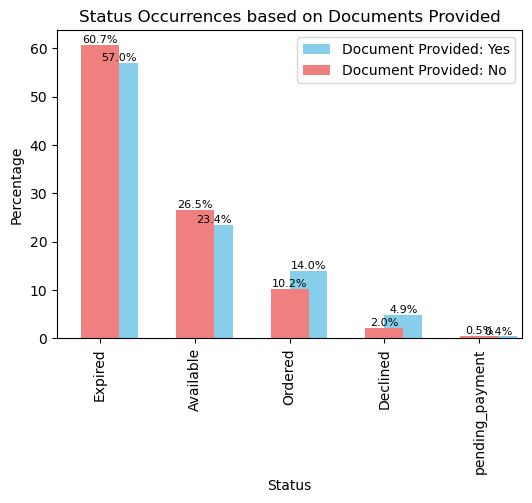

In [783]:

# Sum for each condition
total_yes = doc_prov_yes_counts.sum()
total_no = doc_prov_no_counts.sum()

# Format label
def percentage_formatter(x, pos):
    return f'{x:.1f}%'


fig, ax = plt.subplots(figsize=(6, 4))

# Document Provided: Yes
doc_prov_yes_counts_percentage = doc_prov_yes_counts / total_yes * 100
doc_prov_yes_counts_percentage.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Document Provided: Yes', align='center')
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', fontsize=8)

# Document Provided: No
doc_prov_no_counts_percentage = doc_prov_no_counts / total_no * 100
doc_prov_no_counts_percentage.plot(kind='bar', position=1, width=0.4, color='lightcoral', label='Document Provided: No', align='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge', fontsize=8)

ax.set_title('Status Occurrences based on Documents Provided')
ax.set_ylabel('Percentage')
ax.set_xlabel('Status')
ax.legend()

plt.show()


In [784]:
# type of status depends on result of "Samples Available"

samp_avail_yes_df = merge_outer[merge_outer['Samples Available'] == 'Yes']
samp_avail_no_df = merge_outer[merge_outer['Samples Available'] == 'No']

samp_avail_yes_counts = samp_avail_yes_df['Status'].value_counts(normalize=True) * 100
samp_avail_no_counts = samp_avail_no_df['Status'].value_counts(normalize=True) * 100

print("Samples Available Yes :",samp_avail_yes_counts)
print("---------------------------------------")
print("Samples Available No  :",samp_avail_no_counts)

Samples Available Yes : Status
Expired             55.384615
Available           31.153846
Ordered              8.846154
Declined             3.846154
Contract Created     0.384615
Proceeded            0.384615
Name: proportion, dtype: float64
---------------------------------------
Samples Available No  : Status
Expired            62.686567
Ordered            16.915423
Available          16.417910
Declined            3.482587
pending_payment     0.497512
Name: proportion, dtype: float64


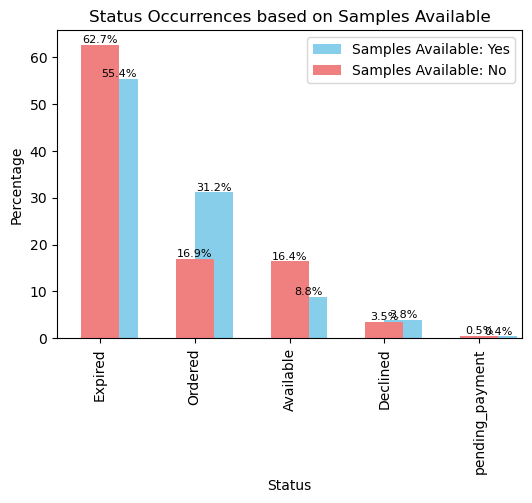

In [785]:

# Sum for each condition
total_yes = samp_avail_yes_counts.sum()
total_no = samp_avail_no_counts.sum()

# Format label
def percentage_formatter(x, pos):
    return f'{x:.1f}%'


fig, ax = plt.subplots(figsize=(6, 4))

# Samples Available: Yes
doc_prov_yes_counts_percentage = samp_avail_yes_counts / total_yes * 100
doc_prov_yes_counts_percentage.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Samples Available: Yes', align='center')
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', fontsize=8)

# Samples Available: No
doc_prov_no_counts_percentage = samp_avail_no_counts / total_no * 100
doc_prov_no_counts_percentage.plot(kind='bar', position=1, width=0.4, color='lightcoral', label='Samples Available: No', align='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge', fontsize=8)

ax.set_title('Status Occurrences based on Samples Available')
ax.set_ylabel('Percentage')
ax.set_xlabel('Status')
ax.legend()

plt.show()


* When "Document Provided" are available Ordered increase of 4% 
* When "Samples are Available" Ordered are multiplied by 2

### Graph : **Status** of the quotation, in relation to the price proposed by the supplier and the price requested by the customer


* in this section we want to highlight the statuses of orders according to the prices requested by customers and the prices offered by customers
* divided into 3 sections high, equal, low

In [787]:
# type of status depends on type of "comp_target_price"

comp_target_price_high_df = merge_outer[merge_outer['comp_target_price'] == 'high']
comp_target_price_egal_df = merge_outer[merge_outer['comp_target_price'] == 'egal']
comp_target_price_low_df = merge_outer[merge_outer['comp_target_price'] == 'low']


comp_target_price_high_df_count = comp_target_price_high_df['Status'].value_counts(normalize=True) * 100
comp_target_price_egal_df_count = comp_target_price_egal_df['Status'].value_counts(normalize=True) * 100
comp_target_price_low_df_count = comp_target_price_low_df['Status'].value_counts(normalize=True) * 100


print("Quote Unit Price > Target Unit Price:",comp_target_price_high_df_count)
print("---------------------------------------")
print("Quote Unit Price = Target Unit Price:",comp_target_price_egal_df_count)
print("---------------------------------------")
print("Quote Unit Price < Target Unit Price:",comp_target_price_low_df_count)


Quote Unit Price > Target Unit Price: Status
Expired      66.233766
Available    21.428571
Ordered       7.792208
Declined      4.545455
Name: proportion, dtype: float64
---------------------------------------
Quote Unit Price = Target Unit Price: Status
Ordered      85.714286
Available    14.285714
Name: proportion, dtype: float64
---------------------------------------
Quote Unit Price < Target Unit Price: Status
Expired             45.205479
Available           32.191781
Ordered             18.493151
Declined             2.054795
pending_payment      0.684932
Contract Created     0.684932
Proceeded            0.684932
Name: proportion, dtype: float64


In [808]:

# Créer les DataFrames à partir des résultats imprimés
data_high = {'high': comp_target_price_high_df_count,}
data_egal = {'egal': comp_target_price_egal_df_count,}
data_low = {'low': comp_target_price_low_df_count,}

# Créer les DataFrames
df_high = pd.DataFrame(data_high)
df_egal = pd.DataFrame(data_egal)
df_low = pd.DataFrame(data_low)

# Concaténer les trois DataFrames le long de l'axe des colonnes
result_df = pd.concat([df_high, df_egal, df_low], axis=1)

# Afficher le DataFrame résultant
result_df



,high,egal,low
Status,,,
Expired,66.233766,NaN,45.205479
Available,21.428571,14.285714,32.191781
Ordered,7.792208,85.714286,18.493151
Declined,4.545455,NaN,2.054795
pending_payment,NaN,NaN,0.684932
Contract Created,NaN,NaN,0.684932
Proceeded,NaN,NaN,0.684932


In [817]:
result_df_grouped = result_df.fillna(0)

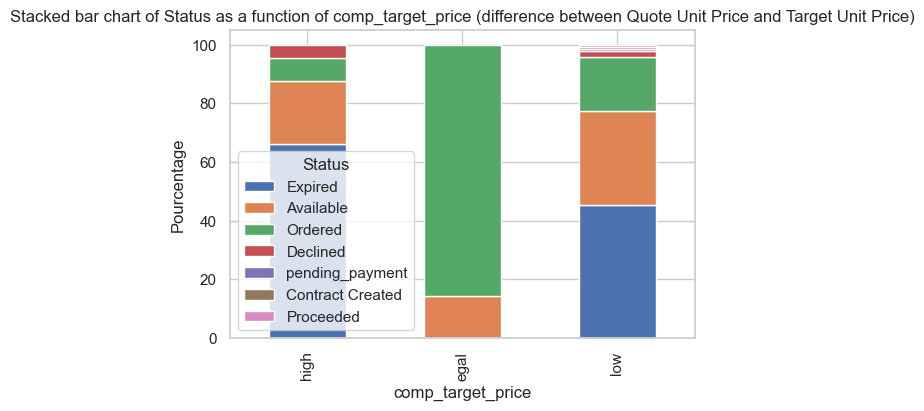

In [836]:
# Remplacer les NaN par 0 pour le tracé
result_df_grouped = result_df_grouped.fillna(0)

# Tracer le diagramme à barres empilées
result_df_grouped.T.plot(kind='bar', stacked=True, figsize=(6, 4))

# Ajouter des étiquettes et un titre
plt.xlabel('comp_target_price')
plt.ylabel('Pourcentage')
plt.title('Stacked bar chart of Status as a function of comp_target_price (difference between Quote Unit Price and Target Unit Price)')

# Afficher le tracé
plt.show()


* ['Target Unit Price'] == price['Quote Unit Price']  ==> 'egal'

* ['Quote Unit Price'] < price['Target Unit Price']:  ==> 'low'

* ['Quote Unit Price'] > price['Target Unit Price']:  ==> 'high'


* if the supplier give a price ("Quote Unit Price") egal or lower than price of custumer ("Target Unit Price"), the number of orders "Ordered" is increasing and the number of "Declined" is decreasing 

### Graph : **Satus** of the quotation if **Sample are Available** and **price between Supplier and Customer**

* In this section we analyze the order status when samples are available, to see if we find a link between the price combination and the availability of samples

In [797]:
# If Samples are available , compare status for the diffrence of price between Target Unit Price and Quote Unit Price	
sampl_avail_and_high = merge_outer[(merge_outer['Samples Available'] == 'Yes') & (merge_outer['comp_target_price'] == 'high')]
sampl_avail_and_egal = merge_outer[(merge_outer['Samples Available'] == 'Yes') & (merge_outer['comp_target_price'] == 'egal')]
sampl_avail_and_low = merge_outer[(merge_outer['Samples Available'] == 'Yes') & (merge_outer['comp_target_price'] == 'low')]

# Compter les occurrences de chaque valeur dans la colonne 'Status'
status_occurrences_high = sampl_avail_and_high['Status'].value_counts(normalize=True) * 100
status_occurrences_egal = sampl_avail_and_egal['Status'].value_counts(normalize=True) * 100
status_occurrences_low = sampl_avail_and_low['Status'].value_counts(normalize=True) * 100


# Afficher les occurrences de status
print("status_occurrences_high :", status_occurrences_high)
print("---------------------------------------")
print("status_occurrences_egal :", status_occurrences_egal)
print("---------------------------------------")
print("status_occurrences_low  :", status_occurrences_low)

status_occurrences_high : Status
Expired      61.676647
Available    25.149701
Ordered       8.383234
Declined      4.790419
Name: proportion, dtype: float64
---------------------------------------
status_occurrences_egal : Status
Ordered    100.0
Name: proportion, dtype: float64
---------------------------------------
status_occurrences_low  : Status
Expired             44.565217
Available           42.391304
Ordered              8.695652
Declined             2.173913
Contract Created     1.086957
Proceeded            1.086957
Name: proportion, dtype: float64


* the combination of samples and prices offered below the prices requested is not significant 
* for a higher price and a lower price the orders placed are 8%. 

### Graph : **Status** of the quotation if **Document Available** and **price between Supplier and Customer**

* In this section we analyze the order status when document provided are available, to see if we find a link between the price combination and the availability of document provided

In [843]:
# If Samples are available , compare status for the diffrence of price between Target Unit Price and Quote Unit Price	
doc_provid_and_high = merge_outer[(merge_outer['Documents Provided'] == 'Yes') & (merge_outer['comp_target_price'] == 'high')]
doc_provid_and_egal = merge_outer[(merge_outer['Documents Provided'] == 'Yes') & (merge_outer['comp_target_price'] == 'egal')]
doc_provid_and_low = merge_outer[(merge_outer['Documents Provided'] == 'Yes') & (merge_outer['comp_target_price'] == 'low')]

# Compter les occurrences de chaque valeur dans la colonne 'Status'
status_occurrences_high_ = doc_provid_and_high['Status'].value_counts(normalize=True) * 100
status_occurrences_egal_ = doc_provid_and_egal['Status'].value_counts(normalize=True) * 100
status_occurrences_low_ = doc_provid_and_low['Status'].value_counts(normalize=True) * 100


# Afficher les occurrences de status
print("status_occurrences_high :", status_occurrences_high_)
print("---------------------------------------")
print("status_occurrences_egal :", status_occurrences_egal_)
print("---------------------------------------")
print("status_occurrences_low  :", status_occurrences_low_)

status_occurrences_high : Status
Expired      63.541667
Available    21.875000
Ordered       8.854167
Declined      5.729167
Name: proportion, dtype: float64
---------------------------------------
status_occurrences_egal : Status
Ordered    100.0
Name: proportion, dtype: float64
---------------------------------------
status_occurrences_low  : Status
Expired             41.428571
Available           28.571429
Ordered             24.285714
Declined             2.857143
Contract Created     1.428571
Proceeded            1.428571
Name: proportion, dtype: float64


In [845]:
doc_price_high = {'high': status_occurrences_high_,}
doc_price_egal = {'egal': status_occurrences_egal_,}
doc_price_low = {'low': status_occurrences_low_,}

# Create DataFrames
doc_price_high_df = pd.DataFrame(doc_price_high)
doc_price_egal_df = pd.DataFrame(doc_price_egal)
doc_price_low_df = pd.DataFrame(doc_price_low)

# Concat df
result_doc_price = pd.concat([doc_price_high_df, doc_price_egal_df, doc_price_low_df], axis=1)

result_doc_price = result_doc_price.fillna(0)

result_doc_price


,high,egal,low
Status,,,
Expired,63.541667,0.0,41.428571
Available,21.875000,0.0,28.571429
Ordered,8.854167,100.0,24.285714
Declined,5.729167,0.0,2.857143
Contract Created,0.000000,0.0,1.428571
Proceeded,0.000000,0.0,1.428571


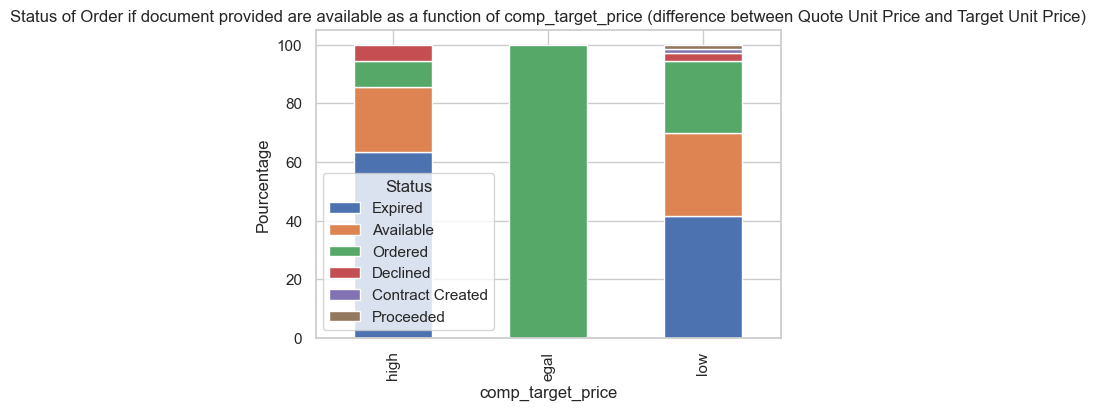

In [847]:

result_doc_price.T.plot(kind='bar', stacked=True, figsize=(6, 4))

# Ajouter des étiquettes et un titre
plt.xlabel('comp_target_price')
plt.ylabel('Pourcentage')
plt.title('Status of Order if document provided are available as a function of comp_target_price (difference between Quote Unit Price and Target Unit Price)')

# Afficher le tracé
plt.show()


* combining a lower offer price than the asking price with the presence of documents increases the percentage of transactions
* from 8% of completed transactions to 24%. 
* only one trasacation combines the filters equal price and document available.

In [837]:
merge_outer.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New,comp_target_price
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.5,3.0,Price,3.50,Available,None,Yes,No,not specified,high
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,3.5,3.0,Price,13.00,Available,None,No,No,not specified,high
3,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,4.65,Declined,pricing: Too high,No,No,pricing,high
4,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,3.88,Declined,pricing,No,No,pricing,high
5,4dedeeb1-12a5-4589-82ee-015e46d85790,3.6,3.6,Price,2.97,Available,None,Yes,Yes,not specified,low


# 5 - Conclusion


* To increase the percentage of transactions, we need to encourage suppliers to provide samples, documents and prices that are equal to or lower than customer demand. 

* When "Document Provided" are available Ordered increase of 4% 
* When "Samples are Available" Ordered are multiplied by 2

* if the supplier give a price ("Quote Unit Price") egal or lower than price of custumer ("Target Unit Price"), the number of orders "Ordered" is increasing and the number of "Declined" is decreasing 

* the combination of samples and prices offered below the prices requested is not significant 
* for a higher price and a lower price the orders placed are 8%. 

* combining a lower offer price than the asking price with the presence of documents increases the percentage of transactions
* from 8% of completed transactions to 24%. 
* only one trasacation combines the filters equal price and document available.
